---
title: "Dimensionality Reduction"
format: html
---

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn import preprocessing
from statsmodels.multivariate.pca import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

I start with dropping the year and state columns. Although my data already has standardized units being that it is the percent increase for a given year in a given state, I will still standardize it with mean zero and variance 1.

# PCA

In [29]:
record=pd.read_csv('data/RecordData.csv')
record=record.drop(['Year','DP05_0073E','RegionName'],axis=1)
record.head()

,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,DP02_0063E,...,DP04_0047E,DP04_0134E,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,Typical Home Value
0,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,0.033732,...,0.007581,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.038688
1,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,1.429793,...,-0.000968,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0.070360
2,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,0.007408,...,-0.004602,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,0.263465
3,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,0.014854,...,0.017788,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,0.076587
4,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,-0.065209,...,-0.043262,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.005789


In [30]:
pca=PCA(record,standardize=True,method='eig')
components=pca.factors
loadings=pca.loadings

In [31]:
pcFeats=pd.concat([record,components],axis=1)
correlation=pcFeats.corr()
correlation=correlation[:-len(components.columns)].loc[:,'comp_00':]

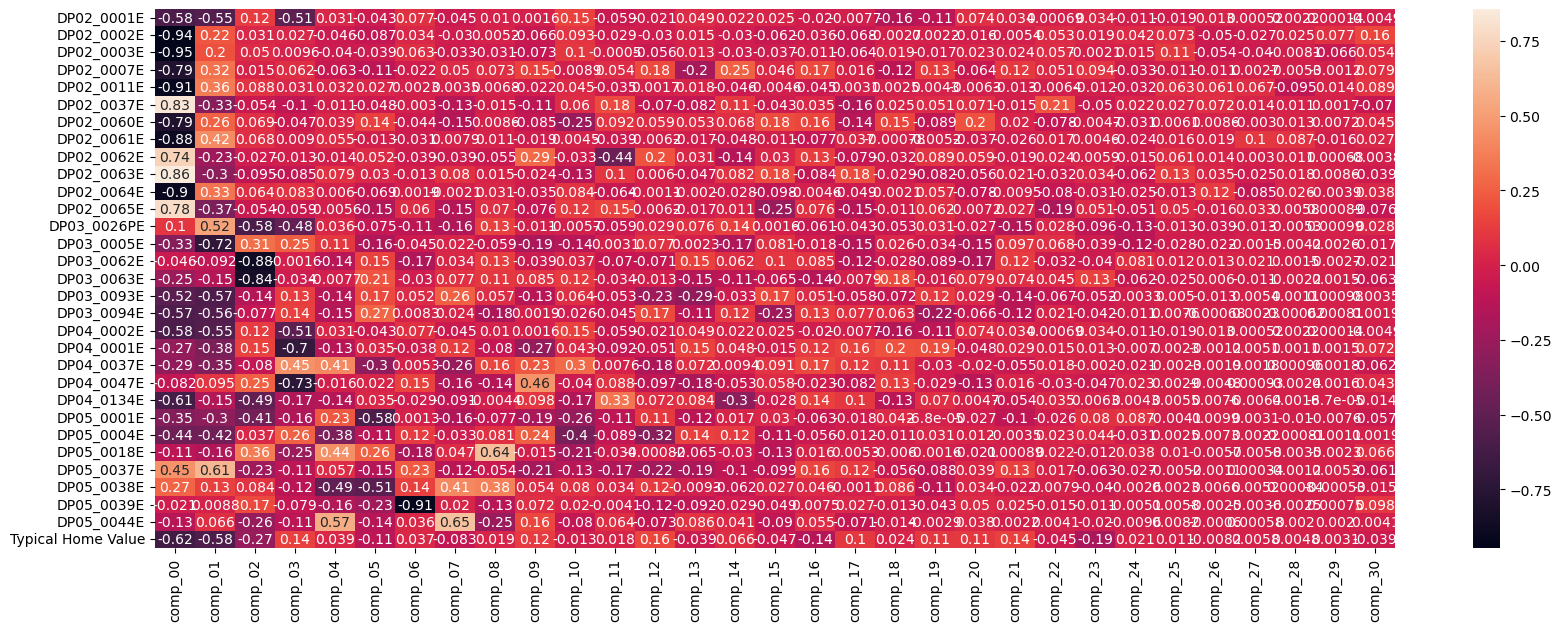

In [32]:
fig,ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation,annot=True)
plt.show()

This shows us what features are correlated with the first principle component, and what features will change together. For example, there is a high negative correlation between the first principle component and percent change of married couple households and married couple households with children under 18 years old. So, you could say that as the percent change of married couple households decrease, so does the percent change of married couple households with children, which makes a lot of sense. There are definitley a lot if redundant variables in my data set.

In [33]:
print(loadings)

                     comp_00   comp_01   comp_02   comp_03   comp_04  \
DP02_0001E         -0.175673 -0.260934  0.070020 -0.330321  0.027259   
DP02_0002E         -0.283868  0.105401  0.018154  0.017716 -0.040512   
DP02_0003E         -0.284526  0.094653  0.029675  0.006253 -0.035268   
DP02_0007E         -0.236327  0.149764  0.008690  0.040273 -0.055856   
DP02_0011E         -0.273940  0.169863  0.052025  0.020394  0.028655   
DP02_0037E          0.250797 -0.157965 -0.031902 -0.065628 -0.009657   
DP02_0060E         -0.238710  0.124871  0.040811 -0.030827  0.034435   
DP02_0061E         -0.265593  0.199353  0.040195  0.005897  0.048563   
DP02_0062E          0.223315 -0.110455 -0.015835 -0.008396 -0.011966   
DP02_0063E          0.257404 -0.141931 -0.056427 -0.055480  0.069882   
DP02_0064E         -0.270798  0.155756  0.038109  0.054203  0.005297   
DP02_0065E          0.235744 -0.177624 -0.032053 -0.038397 -0.004967   
DP03_0026PE         0.030497  0.247655 -0.343971 -0.310877  0.03

The loadings tell us what features have the most impact on the principle componets. For example, the median rooms has the most information captured in the second principle component.

For my analysis I will now attempt to determine the optimal number of principle components.

<Figure size 800x600 with 0 Axes>

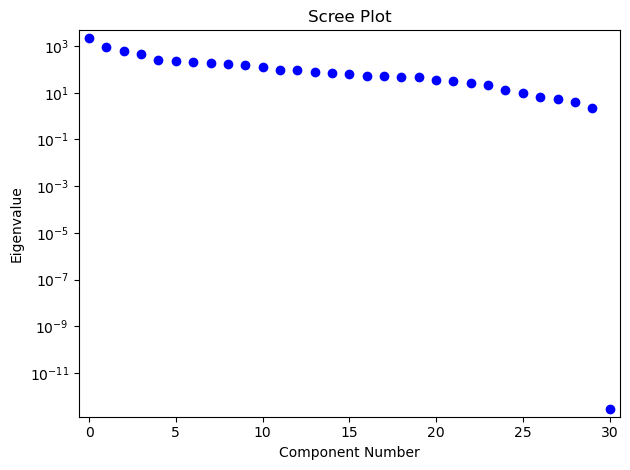

In [35]:
plt.figure(figsize=(8,6))
pca.plot_scree()
plt.show()

It is difficult to see the elbow here, but it seems like there may be an elbow at around 5 principle componenets.

In [53]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [54]:
scaler=StandardScaler()
scaled=scaler.fit_transform(record)
pca = PCA()
components = pca.fit_transform(scaled)

In [55]:
explainedVarianceRatio=pca.explained_variance_ratio_

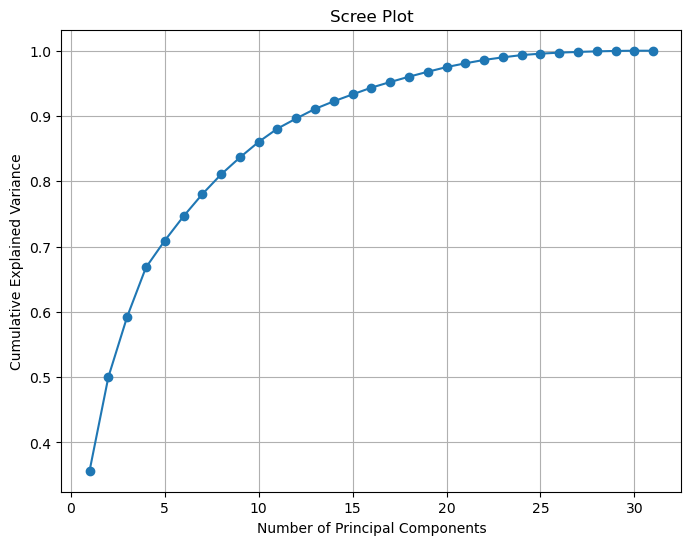

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explainedVarianceRatio) + 1), np.cumsum(explainedVarianceRatio), marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

We will go with 5 principle components

Here we will plot the first two principle components to see if it reveals anything.

In [57]:
pca = PCA(n_components=2)
result = pca.fit_transform(scaled)
resultdf=pd.DataFrame(data=result,columns=['PC1','PC2'])

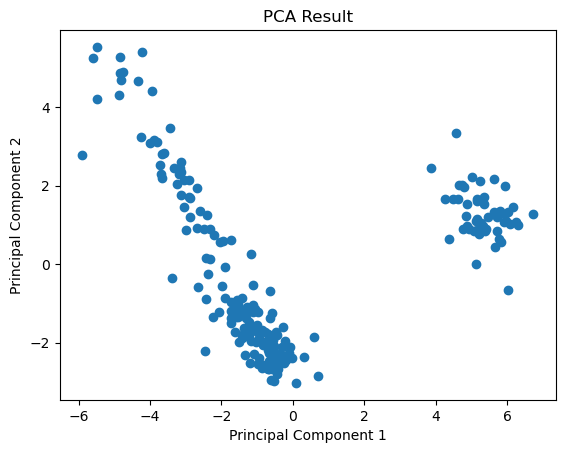

In [58]:
plt.scatter(resultdf['PC1'], resultdf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

This graph does not tell us much, but overall with PCA which features are highly correlated with what principle components and how many principle componenets are optimal, so ultimatley I can reduce the dimensions of my data so I can have more accurate analysis in the future.

# t-SNE

In t-Distributed Stochastic Neighbor Embedding, the key parameter is perplexity which affects the tradeoff between preserving local vs global structures. It aims to map similar datapoints together while keeping differrent data points apart.

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 204 samples in 0.001s...
[t-SNE] Computed neighbors for 204 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 204 / 204
[t-SNE] Mean sigma: 2.276934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.974541
[t-SNE] KL divergence after 300 iterations: 0.267783


In [38]:
import plotly.express as px
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled)
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

In [39]:
fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', title='t-SNE')
fig.show()

# Evaluation and Comparison


PCA utilizes a linear approach, preserving the overall structure of data but may encounter challenges with non-linear relationships and sensitivity to outliers. It is computationally efficient and interpretable, making it well-suited for handling substantial datasets. It is better for data sets with a large number of features, over 50 is commonly used benchmark.

t-SNE is a non-linear technique that excels in capturing local structures and intricate patterns. However, it comes with increased computational demands and sensitivity to hyperparameters. T-SNE is better tailored for smaller datasets.

I would say for my data, PCA is a better method that more easily allows me to see what features I should drop from my analysis, but overall the visulizations produced from both methods show some clustering that reveals reduncincy in my variables.